In [117]:
import numpy as np
from PIL import Image
from tensorflow import keras
from tensorflow.keras.models import load_model
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
import os

In [118]:
model = load_model('.//lung_mask.h5', compile=False) # Model

In [119]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584   

In [120]:
img = Image.open('.\\f12063879a29e672f675977fabdc89_gallery.jpeg')
print("Type image: ", type(img))

Type image:  <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [121]:


lung_images = []
lung_masks = []

# Read lung images
path  = '../api/'
valid_images = [".jpg",".gif",".png",".jpeg"]

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    print('ext',ext)
    if ext.lower() not in valid_images:
        continue
    im = imread(os.path.join(path,f))
    print('im',im)
    print('type im',type(im))
    img = transform.resize(im, (128, 128,3), mode='constant', anti_aliasing=True)
    # Turn image into grayscale
    #im = rgb2gray(im)
    #imshow(im)
    img.shape
    lung_images.append(img)
print(lung_images[0].shape)


ext 
ext .jpeg
im [[ 68  68  68 ... 187 184 187]
 [ 22  22  22 ... 178 178 182]
 [  0   0   0 ... 159 161 165]
 ...
 [ 32  37  41 ...   0   0   0]
 [ 32  39  43 ...   0   0   0]
 [ 32  39  43 ...   0   0   0]]
type im <class 'numpy.ndarray'>
ext .h5
ext .py
ext 
ext .txt
ext .ipynb
(128, 128, 3)


In [122]:
lung_images = np.array(lung_images)
lung_images = lung_images.reshape(len(lung_images),128,128,3)


In [123]:

lung_images.shape


(1, 128, 128, 3)

In [124]:

mask = model.predict(lung_images)

1/1 [==============================] - 0s 82ms/step


In [125]:
print(mask)

[[[[4.69164215e-02 2.47650221e-02 6.45892993e-02]
   [1.38081647e-02 5.34255384e-03 1.47211291e-02]
   [4.62586293e-03 6.18338468e-04 5.10151638e-03]
   ...
   [1.09267694e-05 1.48325441e-07 1.00814850e-05]
   [3.61764141e-05 8.27484826e-07 3.68505280e-05]
   [8.65225855e-04 3.18804668e-05 1.40649360e-03]]

  [[1.50421485e-02 8.64927471e-03 1.68379266e-02]
   [7.70476600e-03 3.57414968e-03 8.25246889e-03]
   [1.37969689e-03 2.88122013e-04 1.61373266e-03]
   ...
   [3.33406689e-08 3.40335787e-10 5.37238591e-08]
   [3.13752878e-07 2.49378207e-09 4.94607036e-07]
   [4.71264320e-05 2.25894610e-07 1.34794900e-05]]

  [[1.07072247e-02 4.34037251e-03 2.21576244e-02]
   [1.23476554e-02 3.47785559e-03 1.86468754e-02]
   [3.38195381e-03 3.56791163e-04 6.56333193e-03]
   ...
   [1.03132010e-08 6.03929060e-11 2.37230200e-08]
   [8.29728464e-08 3.87789328e-10 1.55699212e-07]
   [9.14344855e-06 3.75742495e-08 7.26273674e-06]]

  ...

  [[1.09509286e-02 8.15011002e-03 2.12319922e-02]
   [1.67547483e-

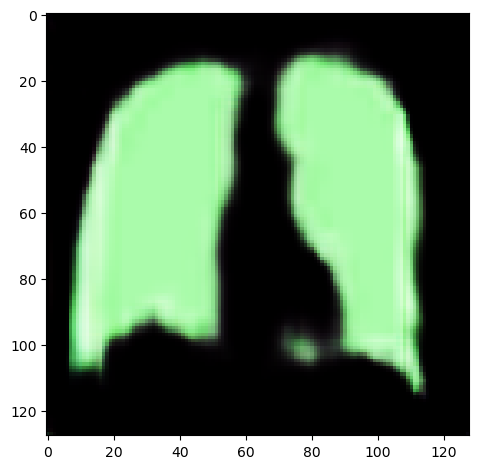

In [126]:
imshow(mask[0])